### **Black Friday Dataset EDA And Feature Engineering**
#### *Cleaning and preparing the data for model training*

**Problem Statement:**

A retail company "ABC Private Limited" wants to understand the customer
purchase behaviour (specifically, purchase amount) against various products of
different categories. They have shared purchase summary of various customers
for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status,
city_type, stay_in_current_city), product details (product_id and product
category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer
against various products which will help them to create personalized offer for
customers against different products.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
df_train = pd.read_csv(r"E:\\EDA\\Day2\\train.csv")
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [44]:
df_test = pd.read_csv(r"E:\\EDA\\Day2\\test.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [45]:
df = pd.concat([df_train,df_test], ignore_index=True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [47]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [48]:
df.drop(["User_ID"],axis=1,inplace=True)
df.drop(["Product_ID"],axis=1,inplace=True)

In [49]:
df.head(5)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [50]:
# Handle Gender
df["Gender"] = df["Gender"].map({"F":0,"M":1})
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [51]:
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].str.replace("+","").astype(int)

In [52]:
# Handling categorical feature Age
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [53]:
df["Age"] = df["Age"].map({'0-17':1, '55+':7, '26-35':3, '46-50':5, '51-55':6, '36-45':4, '18-25':2})
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,1,7,16,C,4,0,8,NaN,NaN,7969.0


In [54]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df["City_Category"] = label.fit_transform(df["City_Category"])
# df["Product_ID"] = label.fit_transform(df["Product_ID"])

In [55]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,0,2,0,3,NaN,NaN,8370.0
1,0,1,10,0,2,0,1,6.0,14.0,15200.0
2,0,1,10,0,2,0,12,NaN,NaN,1422.0
3,0,1,10,0,2,0,12,14.0,NaN,1057.0
4,1,7,16,2,4,0,8,NaN,NaN,7969.0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  int32  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          537685 non-null  float64
 8   Product_Category_3          237858 non-null  float64
 9   Purchase                    550068 non-null  float64
dtypes: float64(3), int32(2), int64(5)
memory usage: 53.8 MB


In [57]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [58]:
# here we focous to replce the null values from Product_Category_2 and Product_Category_3
df["Product_Category_2"].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [59]:
df["Product_Category_2"].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [60]:
df["Product_Category_2"].mode()[0]

8.0

In [61]:
# We replace missing values by using Mode

df["Product_Category_2"] = df["Product_Category_2"].fillna(df["Product_Category_2"].mode()[0])

In [62]:
df["Product_Category_3"] = df["Product_Category_3"].fillna(df["Product_Category_3"].mode()[0])

In [63]:
df.shape

(783667, 10)

<Axes: xlabel='Age', ylabel='Purchase'>

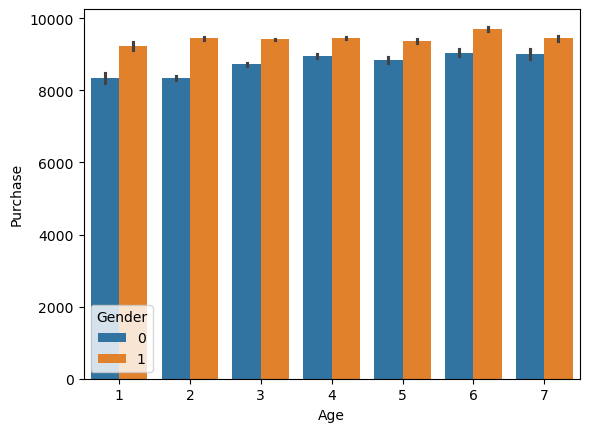

In [64]:
sns.barplot(x = "Age",y = "Purchase",hue = "Gender",data = df)

In [65]:
# Purchasing of men is high then women

<Axes: xlabel='Occupation', ylabel='Purchase'>

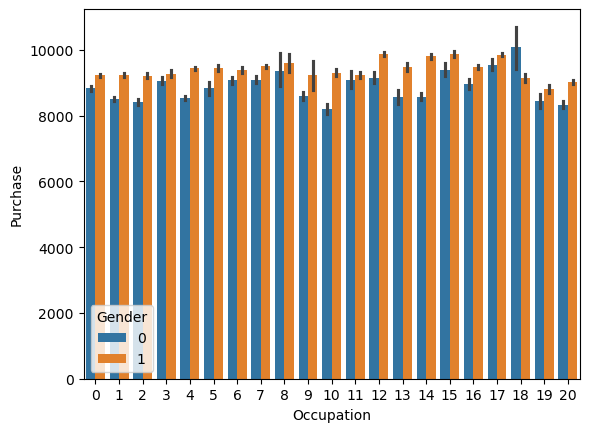

In [66]:
sns.barplot(x = "Occupation",y = "Purchase",hue = "Gender", data = df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

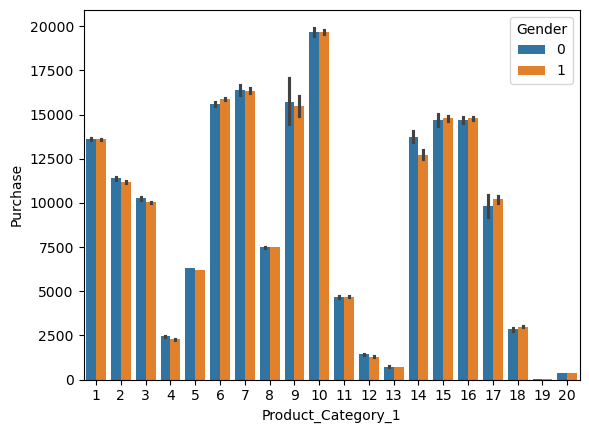

In [67]:
sns.barplot(x = "Product_Category_1",y = "Purchase", hue = "Gender", data = df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

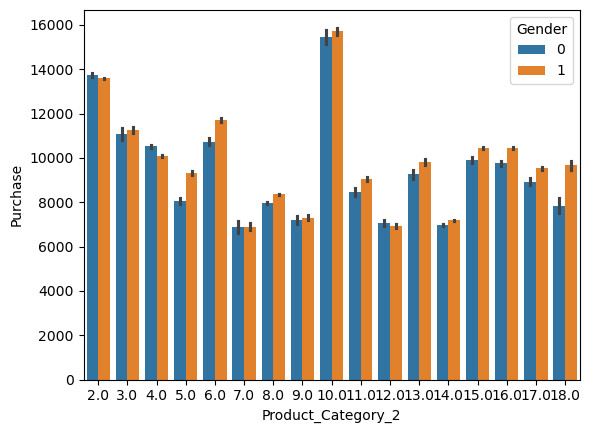

In [68]:
sns.barplot(x = "Product_Category_2",y = "Purchase", hue = "Gender", data = df)

In [69]:
# feature scaling

In [70]:
df_test = df[df['Purchase'].isnull()]
df_train = df[df['Purchase'].notnull()]

In [71]:
x_test = df_test.drop(['Purchase'],axis = 1)
x_train = df_train.drop(['Purchase'],axis = 1)
y_train = df_train["Purchase"]

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix

In [74]:
models = {"Linear_reg" : LinearRegression(),
"KNN" : KNeighborsRegressor(),
"Desi_tree" : DecisionTreeRegressor(),
"R_forest" : RandomForestRegressor(n_estimators=50),
"AdaBoost" : AdaBoostRegressor(),
"Gradient Boosting" : GradientBoostingRegressor()

         }



In [75]:
from sklearn.model_selection import cross_validate
from joblib import parallel_backend

In [76]:
best_model = None
best_score = -np.inf

with parallel_backend('loky'):
    for name, model in models.items():
        results = cross_validate(model, x_train_scaled, y_train, scoring='r2', cv=3, return_estimator=True)  # Save model

        mean_score = np.mean(results['test_score'])  # Mean R² score

        print(f"{name}: Mean R² = {mean_score:.4f}, Std Dev = {np.std(results['test_score']):.4f}")

        # Step 2: Keep the best model
        if mean_score > best_score:
            best_score = mean_score
            best_model = results['estimator'][0]  # Store the first trained model from cross-validation

print("\nBest Model Selected:", best_model)

Linear_reg: Mean R² = 0.1290, Std Dev = 0.0239
KNN: Mean R² = 0.4951, Std Dev = 0.0013
Desi_tree: Mean R² = 0.5569, Std Dev = 0.0118
R_forest: Mean R² = 0.6266, Std Dev = 0.0099
AdaBoost: Mean R² = 0.4517, Std Dev = 0.0264
Gradient Boosting: Mean R² = 0.6448, Std Dev = 0.0086

Best Model Selected: GradientBoostingRegressor()


**Steps to Identify the Best Model:**
1. Look at the Mean R² Score
    - Higher R² Score = Better Model (closer to 1 is best).
2. Check the Standard Deviation (Std Dev)
    - Lower Std Dev = More Stable Model (less variation across folds).
3. Consider Your Use Case
    - If accuracy is most important → Pick the model with the highest Mean R².
    - If stability is needed → Pick the model with the lowest Std Dev.


In [77]:
# by this conclusion Gradient Boosting is the best model

In [78]:
y_pred = best_model.predict(x_test_scaled)
print("Predictions:", y_pred)

Predictions: [13333.50546025 10192.4713346   6193.78222189 ... 12848.4459945
 18192.55440434  2488.31321493]
